## Chap03) Classification
## Logistic Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
x = np.array([6,8,12,15,20])
y = np.array([7,11,13,20.5, 19.3])

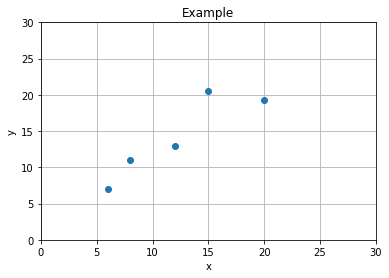

In [ ]:
plt.figure()
plt.plot(x, y, 'o')
plt.title('Example')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0, 30, 0, 30])
plt.grid()

## 1)Dataset

#### -데이터 분석에 사용할 데이터를 Scikit learn으로부터 불러온다
Breast_cancer Dataset
Malignant(악성), Benign(양성)
Dataset info LINK : https://scikit-learn.org/stable/datasets/index.html

#### -위스콘신대 유방암 진단 데이터(WDBC)
- class   : 2
- 샘플수 : 569개
- Feature : 32개 (ID, 진단결과, 30개의 실측값)
- Samples per class : 212(M, labeled '0'), 357(B, labeled '1')

-유방암 데이터로 악성(M), 양성(B) 판단하는 모델 만들기

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

print(cancer['DESCR'][:3000])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
x=pd.DataFrame(cancer.data)
y=pd.Series(cancer.target)
print(x.shape)
print(y.shape)
x.head()

(569, 30)
(569,)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.3, random_state=1234)

In [6]:
print(x_train.shape)
print(x_test.shape)

(398, 30)
(171, 30)


In [7]:
print(y_train.shape)
print(y_test.shape)

(398,)
(171,)


## 2) Model

#### - Scikit learn 에서 제공하는 Logistic Regression 라이브러리를 가지고 와서 모델로 사용한다

In [ ]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression(solver= 'lbfgs').fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print(model.coef_)
print(model.coef_.shape)
model.intercept_

[[ 0.98538176  0.50075211  0.29776533 -0.01051667 -0.03511857 -0.18100526
  -0.23368104 -0.09863983 -0.0374913  -0.00935292  0.0461119   0.38469232
   0.05419303 -0.11314674 -0.0014305  -0.03682048 -0.04144618 -0.01155263
  -0.00260726 -0.00391785  1.09107268 -0.58818577 -0.24902993 -0.020062
  -0.06437091 -0.59010834 -0.67536987 -0.19723223 -0.12798912 -0.05802577]]
(1, 30)


array([0.21096268])

In [ ]:
print('Train Accuracy : ', model.score(x_train, y_train))
print('Test Accuracy : ',model.score(x_test, y_test))

Train Accuracy :  0.9547738693467337
Test Accuracy :  0.9239766081871345


## 3) Hyperparameter조정
 -C: 정규화 규제 조절 상수
 -solver: 최적화에 사용할 알고리즘 결정
 -max_iter: 최적화가 수렴하게 만드는 최대 반복 횟수 값   (default=100)
 -penalty: L1, L2 제약 조건 설정
 -class_weight: 데이터의 Positive에 직접 가중치를 설정하여 학습의 강도 조절

### -C값 조절 (&max_iter)

In [ ]:
model1 = LogisticRegression(C=0.01, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
model2 = LogisticRegression(C=0.1, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
model3 = LogisticRegression(C=1, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
model4 = LogisticRegression(C=10, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
model5 = LogisticRegression(C=100, solver='lbfgs', max_iter=5000).fit(x_train, y_train)

print('Train Accuracy : ', model1.score(x_train, y_train))
print('Train Accuracy : ', model2.score(x_train, y_train))
print('Train Accuracy : ', model3.score(x_train, y_train))
print('Train Accuracy : ', model4.score(x_train, y_train))
print('Train Accuracy : ', model5.score(x_train, y_train))

Train Accuracy :  0.9597989949748744
Train Accuracy :  0.9623115577889447
Train Accuracy :  0.9723618090452262
Train Accuracy :  0.9824120603015075
Train Accuracy :  0.9874371859296482


In [ ]:
print('Test Accuracy : ', model1.score(x_test, y_test))
print('Test Accuracy : ', model2.score(x_test, y_test))
print('Test Accuracy : ', model3.score(x_test, y_test))
print('Test Accuracy : ', model4.score(x_test, y_test))
print('Test Accuracy : ', model5.score(x_test, y_test))

Test Accuracy :  0.9298245614035088
Test Accuracy :  0.9298245614035088
Test Accuracy :  0.935672514619883
Test Accuracy :  0.9473684210526315
Test Accuracy :  0.9415204678362573


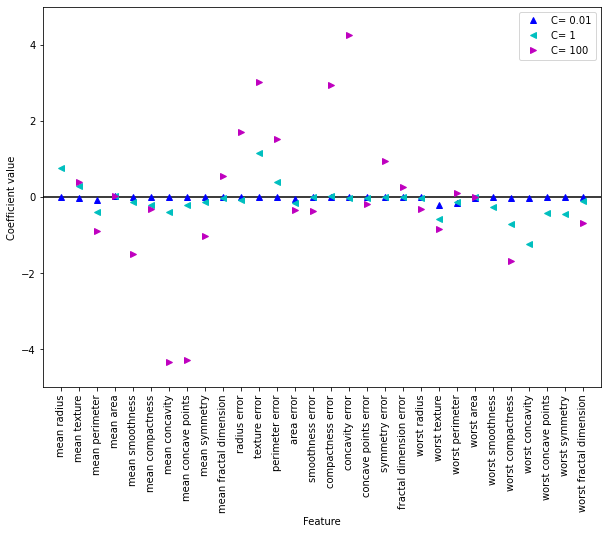

In [ ]:
plt.figure(figsize= (10,7))  #figsize 그래프 크기 조절

plt.plot(model1.coef_.T, '^b', label="C= 0.01")
plt.plot(model3.coef_.T, '<c', label="C= 1")
plt.plot(model5.coef_.T, '>m', label="C= 100")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90) # X축 범주 넣기

xlims = plt.xlim(-1,30)
plt.hlines(0, -1, 30) # 수평선 긋기  hlines(y값, x최소값, x최대값)
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient value")
plt.legend()

### -L2 정규화 적용

In [ ]:
l2_model1 = LogisticRegression(penalty='l2', C=0.01, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
l2_model2 = LogisticRegression(penalty='l2',C=0.1, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
l2_model3 = LogisticRegression(penalty='l2',C=1, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
l2_model4 = LogisticRegression(penalty='l2',C=10, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
l2_model5 = LogisticRegression(penalty='l2',C=100, solver='lbfgs', max_iter=5000).fit(x_train, y_train)

print('Train Accuracy : ', l2_model1.score(x_train, y_train))
print('Train Accuracy : ', l2_model2.score(x_train, y_train))
print('Train Accuracy : ', l2_model3.score(x_train, y_train))
print('Train Accuracy : ', l2_model4.score(x_train, y_train))
print('Train Accuracy : ', l2_model5.score(x_train, y_train))

Train Accuracy :  0.9597989949748744
Train Accuracy :  0.9623115577889447
Train Accuracy :  0.9723618090452262
Train Accuracy :  0.9824120603015075
Train Accuracy :  0.9874371859296482


In [ ]:
print('Test Accuracy : ', l2_model1.score(x_test, y_test))
print('Test Accuracy : ', l2_model2.score(x_test, y_test))
print('Test Accuracy : ', l2_model3.score(x_test, y_test))
print('Test Accuracy : ', l2_model4.score(x_test, y_test))
print('Test Accuracy : ', l2_model5.score(x_test, y_test))

Test Accuracy :  0.9298245614035088
Test Accuracy :  0.9298245614035088
Test Accuracy :  0.935672514619883
Test Accuracy :  0.9473684210526315
Test Accuracy :  0.9415204678362573


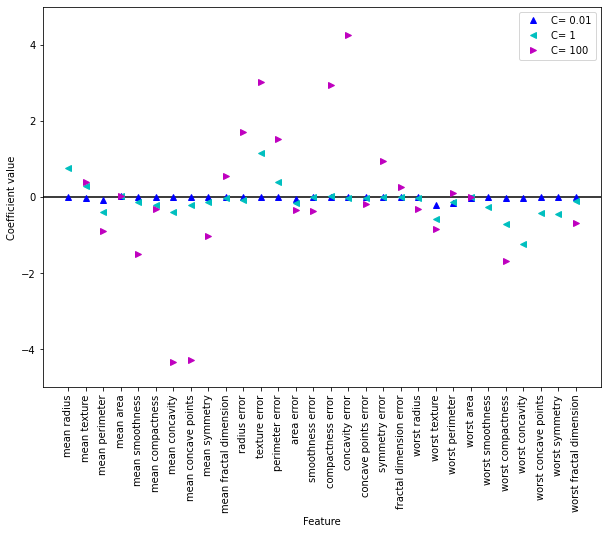

In [ ]:
plt.figure(figsize= (10,7))

plt.plot(l2_model1.coef_.T, '^b', label="C= 0.01")
plt.plot(l2_model3.coef_.T, '<c', label="C= 1")
plt.plot(l2_model5.coef_.T, '>m', label="C= 100")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient value")
plt.legend()

### L1 정규화 적용

In [ ]:
l1_model1 = LogisticRegression(penalty='l1', C=0.01, solver='liblinear', max_iter=5000).fit(x_train, y_train)
l1_model2 = LogisticRegression(penalty='l1',C=0.1, solver='liblinear', max_iter=5000).fit(x_train, y_train)
l1_model3 = LogisticRegression(penalty='l1',C=1, solver='liblinear', max_iter=5000).fit(x_train, y_train)
l1_model4 = LogisticRegression(penalty='l1',C=10, solver='liblinear', max_iter=5000).fit(x_train, y_train)
l1_model5 = LogisticRegression(penalty='l1',C=100, solver='liblinear', max_iter=5000).fit(x_train, y_train)

print('Train Accuracy : ', l1_model1.score(x_train, y_train))
print('Train Accuracy : ', l1_model2.score(x_train, y_train))
print('Train Accuracy : ', l1_model3.score(x_train, y_train))
print('Train Accuracy : ', l1_model4.score(x_train, y_train))
print('Train Accuracy : ', l1_model5.score(x_train, y_train))

Train Accuracy :  0.9271356783919598
Train Accuracy :  0.9422110552763819
Train Accuracy :  0.9673366834170855
Train Accuracy :  0.9824120603015075
Train Accuracy :  0.9974874371859297


In [ ]:
print('Test Accuracy : ', l1_model1.score(x_test, y_test))
print('Test Accuracy : ', l1_model2.score(x_test, y_test))
print('Test Accuracy : ', l1_model3.score(x_test, y_test))
print('Test Accuracy : ', l1_model4.score(x_test, y_test))
print('Test Accuracy : ', l1_model5.score(x_test, y_test))

Test Accuracy :  0.9181286549707602
Test Accuracy :  0.9239766081871345
Test Accuracy :  0.935672514619883
Test Accuracy :  0.9415204678362573
Test Accuracy :  0.9532163742690059


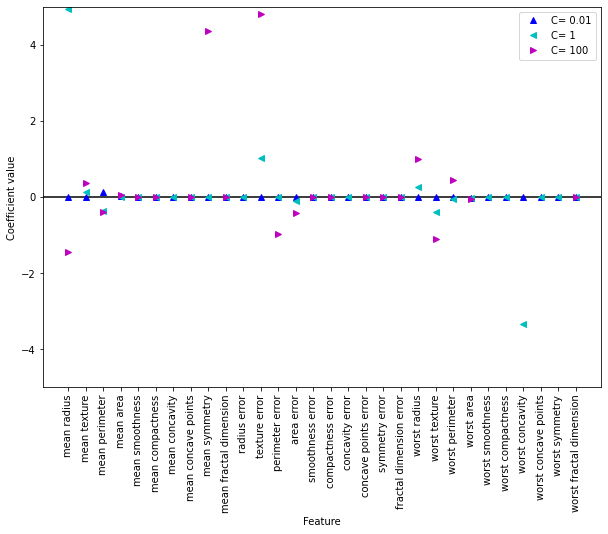

In [ ]:
plt.figure(figsize= (10,7))

plt.plot(l1_model1.coef_.T, '^b', label="C= 0.01")
plt.plot(l1_model3.coef_.T, '<c', label="C= 1")
plt.plot(l1_model5.coef_.T, '>m', label="C= 100")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient value")
plt.legend()

## 4.성능평가

### -최종모델 선정

In [ ]:

final_model = LogisticRegression(penalty='l1',
                                 C=100,
                                 solver='liblinear',
                                 max_iter=5000).fit(x_train, y_train)


In [ ]:
pred_train = final_model.predict(x_train)
pred_test = final_model.predict(x_test)
pred_test

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0])

### - 성능 평가

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion = confusion_matrix(y_test,pred_test)
acc       = accuracy_score(y_test, pred_test)
prc       = precision_score(y_test,pred_test)
rec       = recall_score(y_test,pred_test)
f1s       = f1_score(y_test,pred_test)

print('<Confusion matrix>')
print(confusion)
print(f'Accuracy:{acc:.2f}, Precision: {prc:.2f}, Recall: {rec:.2f}, F1-score: {f1s:.2f}')

<Confusion matrix>
[[ 60   6]
 [  2 103]]
Accuracy:0.95, Precision: 0.94, Recall: 0.98, F1-score: 0.96


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        66
           1       0.94      0.98      0.96       105

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



### -정확도(Precision) 과 재현율(Recall)

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test,final_model.predict_proba(x_test)[:,1])

print(precisions.shape)
print(thresholds.shape)

(114,)
(113,)


In [ ]:
precisions

array([0.92920354, 0.92857143, 0.93693694, 0.93636364, 0.94495413,
       0.9537037 , 0.96261682, 0.96226415, 0.97142857, 0.98076923,
       0.98058252, 0.98039216, 0.98019802, 0.98      , 0.97979798,
       0.97959184, 0.97938144, 0.97916667, 0.97894737, 0.9787234 ,
       0.97849462, 0.97826087, 0.97802198, 0.98888889, 0.98876404,
       0.98863636, 0.98850575, 0.98837209, 0.98823529, 0.98809524,
       0.98795181, 0.98780488, 0.98765432, 0.9875    , 0.98734177,
       0.98717949, 0.98701299, 0.98684211, 0.98666667, 0.98648649,
       0.98630137, 0.98611111, 0.98591549, 0.98571429, 0.98550725,
       0.98529412, 0.98507463, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [ ]:
recalls

array([1.        , 0.99047619, 0.99047619, 0.98095238, 0.98095238,
       0.98095238, 0.98095238, 0.97142857, 0.97142857, 0.97142857,
       0.96190476, 0.95238095, 0.94285714, 0.93333333, 0.92380952,
       0.91428571, 0.9047619 , 0.8952381 , 0.88571429, 0.87619048,
       0.86666667, 0.85714286, 0.84761905, 0.84761905, 0.83809524,
       0.82857143, 0.81904762, 0.80952381, 0.8       , 0.79047619,
       0.78095238, 0.77142857, 0.76190476, 0.75238095, 0.74285714,
       0.73333333, 0.72380952, 0.71428571, 0.7047619 , 0.6952381 ,
       0.68571429, 0.67619048, 0.66666667, 0.65714286, 0.64761905,
       0.63809524, 0.62857143, 0.62857143, 0.61904762, 0.60952381,
       0.6       , 0.59047619, 0.58095238, 0.57142857, 0.56190476,
       0.55238095, 0.54285714, 0.53333333, 0.52380952, 0.51428571,
       0.5047619 , 0.4952381 , 0.48571429, 0.47619048, 0.46666667,
       0.45714286, 0.44761905, 0.43809524, 0.42857143, 0.41904762,
       0.40952381, 0.4       , 0.39047619, 0.38095238, 0.37142

In [ ]:
thresholds

array([0.24793603, 0.2669557 , 0.42598705, 0.44587659, 0.53555415,
       0.71902179, 0.90864746, 0.92321927, 0.96109273, 0.96770244,
       0.98651089, 0.98822588, 0.98906362, 0.99495036, 0.99513484,
       0.99553104, 0.99730663, 0.99738308, 0.99806695, 0.99834613,
       0.99877554, 0.99913989, 0.99930155, 0.99930648, 0.99938882,
       0.99941194, 0.99944038, 0.99944041, 0.99953735, 0.99980383,
       0.99993232, 0.99994944, 0.99994952, 0.9999626 , 0.99996385,
       0.99997318, 0.99997322, 0.99997506, 0.99998968, 0.99999028,
       0.99999349, 0.99999616, 0.99999686, 0.99999739, 0.99999763,
       0.99999787, 0.99999821, 0.99999851, 0.99999895, 0.99999949,
       0.99999954, 0.99999961, 0.99999961, 0.99999972, 0.99999976,
       0.99999978, 0.99999981, 0.99999983, 0.99999986, 0.99999992,
       0.99999992, 0.99999993, 0.99999994, 0.99999995, 0.99999995,
       0.99999995, 0.99999996, 0.99999996, 0.99999997, 0.99999998,
       0.99999998, 0.99999998, 0.99999999, 0.99999999, 0.99999

In [ ]:
final_model.predict_proba(x_test)
np.sum(final_model.predict_proba(x_test),axis=1) #양성확률+음성확률 = 1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

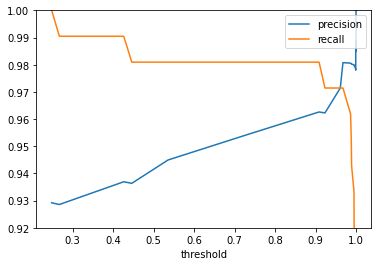

In [ ]:
# Threshold 와 관계
plt.figure()
plt.plot(thresholds, precisions[:-1], label = 'precision') # precision 마지막 값은 1이 포함, 마지막 값 제외
plt.plot(thresholds, recalls[:-1], label = 'recall')  # recall의 마지막 값은 0이 포함, 마지막 값 제외
plt.xlabel('threshold')
plt.ylim([0.92,1])
plt.legend(loc = 'upper right') # upper/ center/ lower

* threshold 조절

In [ ]:
prob = final_model.predict_proba(x_test)[:, 1] # class 1 에 해당하는 값만 지정
prob = np.round(prob,3)  # numpy에서 지정된 소수점 자리까지 반올림
prob

array([0.998, 1.   , 1.   , 1.   , 1.   , 1.   , 0.   , 1.   , 0.   ,
       0.   , 0.   , 0.998, 1.   , 0.997, 1.   , 0.   , 1.   , 1.   ,
       1.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.999, 0.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 0.   , 1.   , 0.997, 1.   ,
       1.   , 0.   , 0.446, 1.   , 0.   , 1.   , 0.   , 0.995, 0.989,
       1.   , 1.   , 0.999, 0.   , 0.999, 0.968, 1.   , 1.   , 0.   ,
       0.923, 1.   , 1.   , 1.   , 1.   , 0.   , 0.987, 1.   , 0.996,
       1.   , 1.   , 0.   , 0.   , 1.   , 1.   , 0.961, 1.   , 0.   ,
       1.   , 0.   , 1.   , 1.   , 1.   , 0.   , 1.   , 0.   , 1.   ,
       1.   , 0.999, 0.267, 0.   , 0.   , 0.   , 0.   , 0.999, 0.062,
       1.   , 1.   , 1.   , 0.   , 0.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 0.   , 0.   , 1.   , 1.   , 0.   , 1.   , 1.   , 0.   ,
       0.   , 0.999, 0.   , 1.   , 0.   , 0.   , 0.999, 1.   , 1.   ,
       0.   , 1.   , 0.   , 1.   , 1.   , 1.   , 1.   , 0.   , 1.   ,
       0.   , 0.   ,

In [ ]:
from sklearn.preprocessing import Binarizer
prob = prob.reshape(-1,1) # 차원 추가
adj_prob = Binarizer(threshold=0.9).fit_transform(prob)              # threshold 값보다 작거나 같으면 0 , else 1

In [ ]:
#Threshold 값 바뀐 precision, recall 값 확인
report = classification_report(y_test, adj_prob)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        66
           1       0.96      0.98      0.97       105

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

